* REG_YYMM : 년월
* CARD_SIDO_NM : 카드이용지역_시도(가맹정 주소 기준)
* CARD_CCG_NM : 카드이용지역_시군구(가맹점 주소 기준)
* STD_CLSS_NM : 업종명
* HOM_SIDO_NM : 거주지역_시도(고객 집주소 기준)
* HOM_CCG_NM : 거주지역_시군구(고객 집주소 기준)
* AGE : 연령대
* SEX_CTGO_CD : 성별 (1:남성, 2:여성)
* FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
* CSTMR_CNT : 이용고객수(명)
* AMT : 이용금액(원)
* CNT : 이용건수(건)

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
#pd.options.display.float_format = '{:.1f}'.format
pd.options.display.float_format = '{}'.format

In [2]:
#jeju = pd.read_csv("201901-202003.csv")
#jeju.to_pickle("201901-202003.pkl")
jeju = pd.read_pickle("201901-202003.pkl")
jeju.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [3]:
jeju.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
REG_YYMM        24697792 non-null int64
CARD_SIDO_NM    24697792 non-null object
CARD_CCG_NM     24610579 non-null object
STD_CLSS_NM     24697792 non-null object
HOM_SIDO_NM     24697792 non-null object
HOM_CCG_NM      24550005 non-null object
AGE             24697792 non-null object
SEX_CTGO_CD     24697792 non-null int64
FLC             24697792 non-null int64
CSTMR_CNT       24697792 non-null int64
AMT             24697792 non-null int64
CNT             24697792 non-null int64
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [4]:
jeju.shape

(24697792, 12)

In [5]:
jeju.describe()

,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
count,24697792.0,24697792.0,24697792.0,24697792.0,24697792.0,24697792.0
mean,201923.05559480784,1.412644741683791,2.8044286307051256,61.96854913184142,2441352.9375017006,126.04497268419784
std,36.195613587559855,0.4923099314747913,1.3754553910239156,355.9175386704264,17260959.040559072,966.9387077529708
min,201901.0,1.0,1.0,3.0,20.0,1.0
25%,201904.0,1.0,2.0,4.0,90200.0,5.0
50%,201908.0,1.0,3.0,8.0,252680.0,12.0
75%,201911.0,2.0,4.0,24.0,843337.25,40.0
max,202003.0,2.0,5.0,32813.0,2349523701.0,120357.0


In [6]:
corr= jeju.corr()
corr

,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
REG_YYMM,1.0,-0.009399180832815528,-0.005525051630320268,0.0014323841631575576,0.0031669228437545653,0.0021439968105275643
SEX_CTGO_CD,-0.009399180832815528,1.0,-0.0231336692034621,0.008258294969256962,-0.005424052642416812,0.0004688669495231857
FLC,-0.005525051630320268,-0.0231336692034621,1.0,0.006773814657919058,0.04109903513855821,-0.001011045819053748
CSTMR_CNT,0.0014323841631575576,0.008258294969256962,0.006773814657919058,1.0,0.8663385004266737,0.9303556040718977
AMT,0.0031669228437545653,-0.005424052642416812,0.04109903513855821,0.8663385004266737,1.0,0.7781016365406437
CNT,0.0021439968105275643,0.0004688669495231857,-0.001011045819053748,0.9303556040718977,0.7781016365406437,1.0


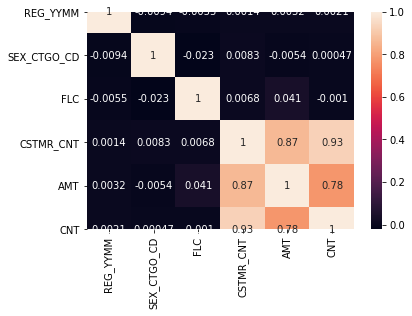

In [7]:
sns.heatmap(corr, annot=True)

### 결측값 제거

In [8]:
jeju.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [9]:
jeju['CARD_CCG_NM'] = jeju['CARD_CCG_NM'].fillna(0)

In [10]:
jeju['HOM_CCG_NM'] = jeju['HOM_CCG_NM'].fillna(0)

In [11]:
jeju.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
REG_YYMM        24697792 non-null int64
CARD_SIDO_NM    24697792 non-null object
CARD_CCG_NM     24697792 non-null object
STD_CLSS_NM     24697792 non-null object
HOM_SIDO_NM     24697792 non-null object
HOM_CCG_NM      24697792 non-null object
AGE             24697792 non-null object
SEX_CTGO_CD     24697792 non-null int64
FLC             24697792 non-null int64
CSTMR_CNT       24697792 non-null int64
AMT             24697792 non-null int64
CNT             24697792 non-null int64
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [12]:
jeju.isnull().sum().sum()

0

### AGE int형으로 변경

In [13]:
jeju['AGE'].value_counts().reset_index()

,index,AGE
0,40s,5802447
1,30s,5550519
2,20s,5091675
3,50s,4455687
4,60s,2606168
5,70s,876622
6,10s,314674


In [14]:
jeju.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [15]:
jeju.AGE = jeju.AGE.str.replace('s','').astype('int') 

In [16]:
jeju.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,1,4,3,1047300,3


In [17]:
jeju['AGE'].value_counts().reset_index()

,index,AGE
0,40,5802447
1,30,5550519
2,20,5091675
3,50,4455687
4,60,2606168
5,70,876622
6,10,314674


In [18]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
REG_YYMM        int64
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             int32
SEX_CTGO_CD     int64
FLC             int64
CSTMR_CNT       int64
AMT             int64
CNT             int64
dtypes: int32(1), int64(6), object(5)
memory usage: 2.1+ GB


### 칼럼 확인

In [ ]:
jeju['REG_YYMM'].value_counts().reset_index()

In [ ]:
# CARD_SIDO_NM : 카드이용지역_시도(가맹정 주소 기준)
jeju['CARD_SIDO_NM'].value_counts().reset_index()

In [ ]:
# CARD_CCG_NM : 카드이용지역_시군구(가맹점 주소 기준)
jeju['CARD_CCG_NM'].value_counts().reset_index()

In [ ]:
# STD_CLSS_NM : 업종명
jeju['STD_CLSS_NM'].value_counts().reset_index()

In [ ]:
jeju.STD_CLSS_NM.nunique()

In [ ]:
# HOM_SIDO_NM : 거주지역_시도(고객 집주소 기준)
jeju['HOM_SIDO_NM'].value_counts().reset_index()

In [ ]:
# HOM_CCG_NM : 거주지역_시군구(고객 집주소 기준)
jeju['HOM_CCG_NM'].value_counts().reset_index()

In [ ]:
jeju['AGE'].value_counts().reset_index()

In [ ]:
jeju['SEX_CTGO_CD'].value_counts()

In [ ]:
# FLC : 가구생애주기(1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
jeju['FLC'].value_counts().reset_index()

In [ ]:
jeju['CSTMR_CNT'].value_counts().reset_index()

### 카드이용 금액& 횟수 함수화 

In [ ]:
# 지역에 따른 업종별 카드이용금액 
def type_amt(data):
    sectors =  pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['SIDO'])
    for area in data.CARD_SIDO_NM.unique():
        area_data = data[data.CARD_SIDO_NM == area]
        grouped_area = area_data.groupby('STD_CLSS_NM')['AMT'].sum().reset_index()
        grouped_area = grouped_area.rename(columns={'AMT':area})
        sectors = sectors.join(grouped_area[area])
    return sectors

# 지역에 따른 업종별 카드이용횟수
def type_cnt(data):
    sectors = pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['SIDO'])
    for area in data.CARD_SIDO_NM.unique():
        area_data = data[data.CARD_SIDO_NM == area]
        grouped_area = area_data.groupby('STD_CLSS_NM')['CNT'].sum().reset_index()
        grouped_area = grouped_area.rename(columns={'CNT':area})
        sectors = sectors.join(grouped_area[area])
    return sectors


# 년월에 따른 업종별 카드이용금액
def yymm_amt(data):
    sectors = pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['YYMM'])
    for date in data.REG_YYMM.unique():
        date_data = data[data.REG_YYMM == date]
        grouped_date = date_data.groupby('STD_CLSS_NM')['AMT'].sum().reset_index()
        grouped_date = grouped_date.rename(columns={'AMT':date})
        sectors = sectors.join(grouped_date[date])
    return sectors

# 년월에 따른 업종별 카드이용횟수
def yymm_cnt(data):
    sectors = pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['YYMM'])
    for date in data.REG_YYMM.unique():
        date_data = data[data.REG_YYMM == date]
        grouped_date = date_data.groupby('STD_CLSS_NM')['CNT'].sum().reset_index()
        grouped_date = grouped_date.rename(columns={'CNT':date})
        sectors = sectors.join(grouped_date[date])
    return sectors

# 지역과 년월에 따른 업종별 카드이용금액
def type_yymm_amt(data, col):
    import sys
    mod = sys.modules[__name__]
    for area in data.CARD_SIDO_NM.unique():
        sectors = pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['STD_CLSS_NM'])
        area_data = data[data.CARD_SIDO_NM == area]
        for month in area_data.REG_YYMM.unique():
            monthly_data = area_data[area_data.REG_YYMM == month]
            grouped_data = monthly_data.groupby('STD_CLSS_NM')[col].sum().reset_index()
            grouped_data = grouped_data.rename(columns={col:month})
            sectors = pd.merge(sectors, grouped_data, how='left', on='STD_CLSS_NM').fillna(0)
        setattr(mod, 'monthly_amt_{}'.format(area), sectors)

# 지역과 년월에 따른 업종별 카드이용횟수
def type_yymm_cnt(data, col):
    import sys
    mod = sys.modules[__name__]
    for area in data.CARD_SIDO_NM.unique():
        sectors = pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['STD_CLSS_NM'])
        area_data = data[data.CARD_SIDO_NM == area]
        for month in area_data.REG_YYMM.unique():
            monthly_data = area_data[area_data.REG_YYMM == month]
            grouped_data = monthly_data.groupby('STD_CLSS_NM')[col].sum().reset_index()
            grouped_data = grouped_data.rename(columns={col:month})
            sectors = pd.merge(sectors, grouped_data, how='left', on='STD_CLSS_NM').fillna(0)
        setattr(mod, 'monthly_cnt_{}'.format(area), sectors)



In [ ]:
type_amt(jeju)

In [ ]:
type_cnt(jeju)

In [ ]:
yymm_amt(jeju)

In [ ]:
yymm_cnt(jeju)

In [ ]:
type_yymm_amt(jeju, 'AMT')

In [ ]:
type_yymm_cnt(jeju, 'CNT')

In [ ]:
monthly_amt_서울

In [ ]:
monthly_cnt_서울

In [ ]:
#년월별 이용건수
jeju.groupby('REG_YYMM')['AMT'].sum().sort_values(ascending=False).reset_index()

In [ ]:
#년월별 이용건수
jeju.groupby('REG_YYMM')['CNT'].sum().sort_values(ascending=False).reset_index()

### 이용고객수 함수화

In [ ]:
# 지역에 따른 업종별 이용고객수
def type_customer(data):
    sectors =  pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['SIDO'])
    for area in data.CARD_SIDO_NM.unique():
        area_data = data[data.CARD_SIDO_NM == area]
        grouped_area = area_data.groupby('STD_CLSS_NM')['CSTMR_CNT'].sum().reset_index()
        grouped_area = grouped_area.rename(columns={'CSTMR_CNT':area})
        sectors = sectors.join(grouped_area[area])
    return sectors

# 년월에 따른 업종별 이용고객수
def yymm_customer(data):
    sectors = pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['YYMM'])
    for date in data.REG_YYMM.unique():
        date_data = data[data.REG_YYMM == date]
        grouped_date = date_data.groupby('STD_CLSS_NM')['CSTMR_CNT'].sum().reset_index()
        grouped_date = grouped_date.rename(columns={'CSTMR_CNT':date})
        sectors = sectors.join(grouped_date[date])
    return sectors

# 지역과 년월에 따른 업종별 이용고객수
def type_yymm_customer(data, col):
    import sys
    mod = sys.modules[__name__]
    for area in data.CARD_SIDO_NM.unique():
        sectors = pd.DataFrame(data.STD_CLSS_NM.unique(), columns=['STD_CLSS_NM'])
        area_data = data[data.CARD_SIDO_NM == area]
        for month in area_data.REG_YYMM.unique():
            monthly_data = area_data[area_data.REG_YYMM == month]
            grouped_data = monthly_data.groupby('STD_CLSS_NM')[col].sum().reset_index()
            grouped_data = grouped_data.rename(columns={col:month})
            sectors = pd.merge(sectors, grouped_data, how='left', on='STD_CLSS_NM').fillna(0)
        setattr(mod, 'monthly_customer_{}'.format(area), sectors)

In [ ]:
type_customer(jeju)

In [ ]:
yymm_customer(jeju)

In [ ]:
type_yymm_customer(jeju, 'CSTMR_CNT')

In [ ]:
monthly_customer_서울

In [ ]:
jeju.head(60)

In [ ]:
print(jeju.shape)

In [19]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [20]:
data = jeju.fillna('')
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [21]:
df = data.copy()
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)

columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)

In [22]:
df.shape

(1057394, 11)

In [ ]:
"""
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
    """

In [ ]:
#train_num = df_num.sample(frac=1, random_state=0)
#x = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
#y = np.log1p(train_num['AMT'])

In [23]:
obj = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM']
df[obj] = df[obj].apply(lambda x: x.astype('category').cat.codes)

In [ ]:
df.head()

### AMT 정규화

In [ ]:
df.AMT.max()

In [24]:
max = df.AMT.max()
min = df.AMT.min()
df.AMT = (df.AMT - (max*0.5))/(max*0.5)
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,0,0,0,20,1,1,2019,1,4,-0.9999821792195933,4
1,0,0,0,20,1,1,2019,2,3,-0.9999653548452891,3
2,0,0,0,20,1,1,2019,6,3,-0.9999920402041242,3
3,0,0,0,20,1,1,2019,8,3,-0.9999984252202404,3
4,0,0,0,20,1,1,2019,9,3,-0.9999773518038213,3
...,...,...,...,...,...,...,...,...,...,...,...
1057389,16,40,16,70,2,5,2019,3,3,-0.9999915248216575,4
1057390,16,40,16,70,2,5,2019,5,5,-0.9999811140958287,7
1057391,16,40,16,70,2,5,2019,10,7,-0.9999680577400037,7
1057392,16,40,16,70,2,5,2019,12,3,-0.9999858098027482,3


In [ ]:
mean = df.AMT.mean()
std = df.AMT.std()
df.AMT = (df.AMT - mean) / std
df

In [ ]:
df.head()

In [ ]:
#k = int(len(x)*0.9)

In [ ]:
#x_train = x[:k]
#y_train = y[:k]
#x_val = x[k:]
#y_val = y[k:]

### LGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier
import glob

In [ ]:
train_ds = lgb.Dataset(x_train, label=y_train)
val_ds = lgb.Dataset(x_val, label=y_val)

In [ ]:
params = {'learning_rate' : 0.05, 'boosting_type': 'gbdt', 'objective': 'tweedie', 'tweedie_variance_power': 1.1,
          'metric': 'rmse', 'sub_row' : 0.75, 'lambda_l2' : 0.1}

In [ ]:
model = lgb.train(params, train_ds, 1000, val_ds, verbose_eval = 100, early_stopping_rounds = 100)

In [ ]:
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=x.columns)

In [ ]:
pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [ ]:
submission = pd.read_csv('data/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission.csv', encoding='utf-8-sig')
submission.head()

### 모델 

In [38]:
from matplotlib.pyplot import *

Text(0, 0.5, 'Cases')

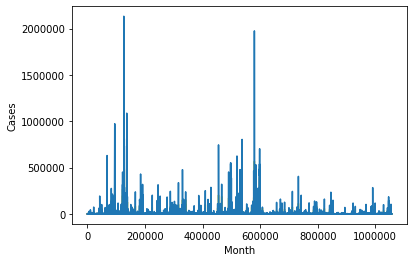

In [40]:
data = df

plot(data)
xlabel("Month")
ylabel("Cases")

In [45]:
numTimeStepsTrain = floor(0.9*numel(data))

dataTrain = data[1:numTimeStepsTrain+1]
dataTest = data[numTimeStepsTrain+1:end]

NameError: name 'floor' is not defined